In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

In [5]:
import splitfolders
splitfolders.ratio('D:/Other Projects/Crack detection/archive', output = 'output', seed = 1317, ratio = (0.8, 0.1, 0.1))

In [6]:
BATCh = 26
IMG_WIDTH = 96
IMG_HEIGHT = 96

In [9]:
train_loader = tf.keras.preprocessing.image_dataset_from_directory('D:/Other Projects/Crack detection/output/train', seed=123, image_size=(IMG_HEIGHT, IMG_WIDTH), batch_size = BATCh)
test_loader = tf.keras.preprocessing.image_dataset_from_directory('D:/Other Projects/Crack detection/output/test', seed=123, image_size = (IMG_HEIGHT, IMG_WIDTH), batch_size = BATCh)
validation_loader = tf.keras.preprocessing.image_dataset_from_directory('D:/Other Projects/Crack detection/output/val', seed=123, image_size = (IMG_HEIGHT, IMG_WIDTH), batch_size=BATCh)

Found 32000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.


In [10]:
class_names = train_loader.class_names
print(class_names)

['Negative', 'Positive']


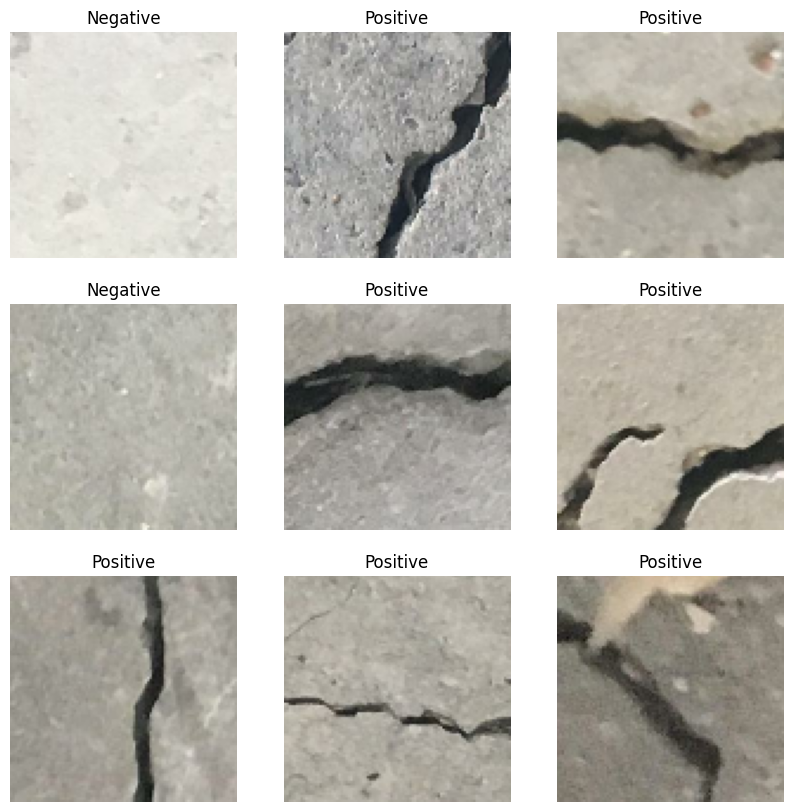

In [11]:
plt.figure(figsize = (10, 10))
for images, labels in train_loader.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [12]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_loader.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_dataset = test_loader.cache().prefetch(buffer_size=AUTOTUNE)
val_dataset = validation_loader.cache().prefetch(buffer_size=AUTOTUNE)

In [14]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(IMG_HEIGHT, 
                                                              IMG_WIDTH,
                                                              3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

model = tf.keras.models.Sequential([
    data_augmentation,
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
  
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(class_names))
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 96, 96, 3)         0         
                                                                 
 rescaling_1 (Rescaling)     (None, 96, 96, 3)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 96, 96, 16)        448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 48, 48, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 48, 48, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                  

In [17]:
epochs = 50
history = model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs
)

Epoch 1/50
1231/1231 [==============================] - 220s 162ms/step - loss: 0.0876 - accuracy: 0.9688 - val_loss: 0.0387 - val_accuracy: 0.9883
Epoch 2/50
1231/1231 [==============================] - 186s 151ms/step - loss: 0.0292 - accuracy: 0.9904 - val_loss: 0.0378 - val_accuracy: 0.9883
Epoch 3/50
1231/1231 [==============================] - 188s 152ms/step - loss: 0.0235 - accuracy: 0.9933 - val_loss: 0.0349 - val_accuracy: 0.9883
Epoch 4/50
1231/1231 [==============================] - 230s 187ms/step - loss: 0.0202 - accuracy: 0.9936 - val_loss: 0.0185 - val_accuracy: 0.9952
Epoch 5/50
1231/1231 [==============================] - 225s 183ms/step - loss: 0.0153 - accuracy: 0.9959 - val_loss: 0.0129 - val_accuracy: 0.9973
Epoch 6/50
1231/1231 [==============================] - 220s 179ms/step - loss: 0.0166 - accuracy: 0.9957 - val_loss: 0.0159 - val_accuracy: 0.9958
Epoch 7/50
1231/1231 [==============================] - 226s 183ms/step - loss: 0.0100 - accuracy: 0.9974 - val_

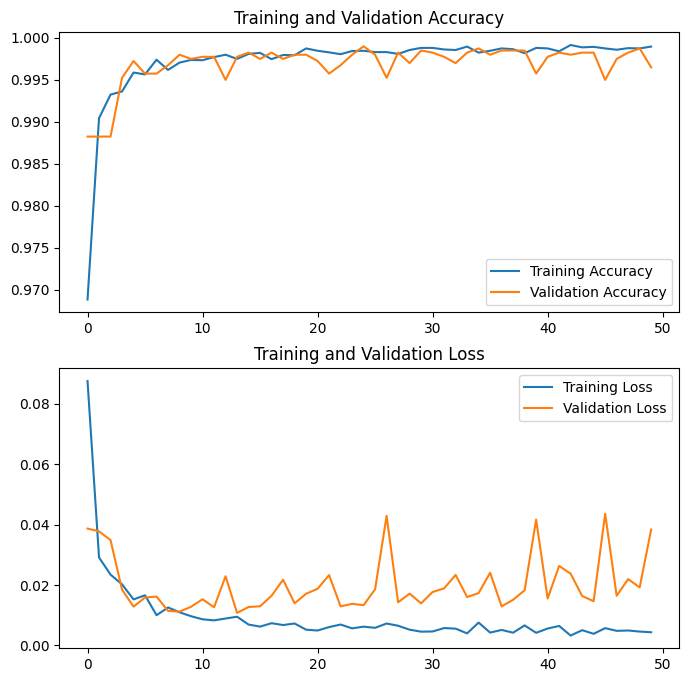

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
loss, accuracy = model.evaluate(test_dataset)

154/154 [==============================] - 9s 54ms/step - loss: 0.0534 - accuracy: 0.9970


1/1 [==============================] - 0s 30ms/step


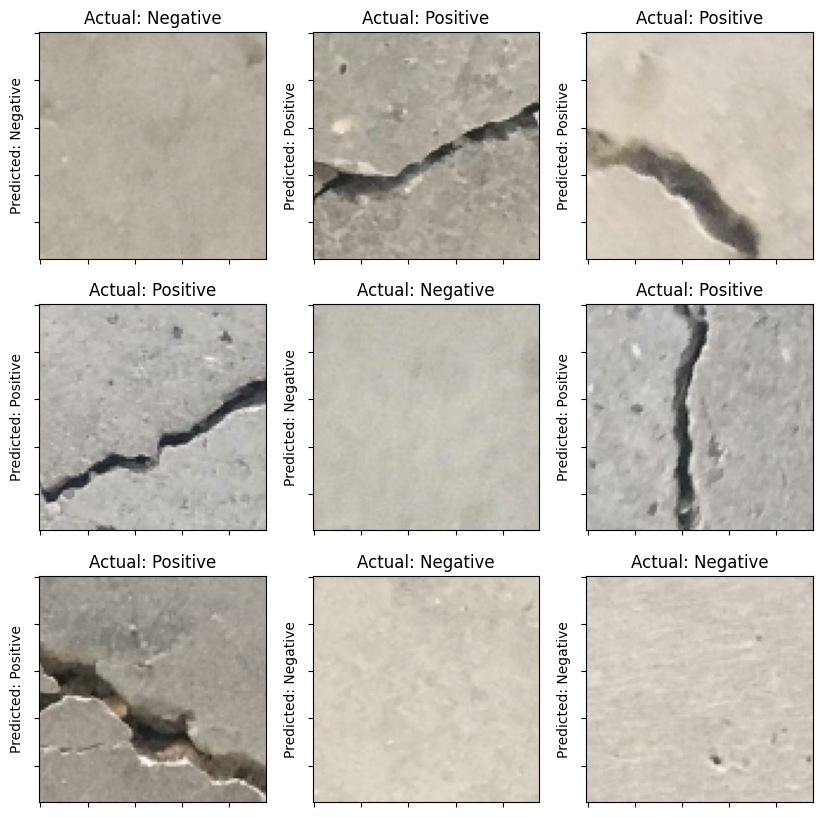

In [20]:
plt.figure(figsize=(10, 10))
for images, labels in test_loader.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        plt.ylabel("Predicted: "+class_names[np.argmax(score)])
        plt.title("Actual: "+class_names[labels[i]])
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])